In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import joblib
import datetime
import seaborn as sns

In [3]:
df = pd.read_csv(r"E:\used_car_price_prediction\Used_Car_Price_Prediction.csv")

In [5]:
df.head(10)

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,...,2,397677,404177.0,great,2021-04-04T07:09:18.583,True,8975,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,...,1,272935,354313.0,great,2021-03-22T14:07:32.833,True,6167,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,...,1,469605,NaN,great,2021-03-20T05:36:31.311,True,11096,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,...,1,294262,374326.0,great,2021-01-21T12:59:19.299,True,7154,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,...,1,360716,367216.0,great,2021-04-01T13:33:40.733,True,8397,54225,False,False
5,maruti alto k10,2018,petrol,23534,335299,noida,1055,hatchback,NaN,vxi (o) amt,...,1,343212,439056.0,great,2021-04-13T05:55:16.99,True,7788,50295,False,False
6,maruti ritz,2012,diesel,41213,281999,noida,909,hatchback,manual,vdi,...,1,201200,NaN,great,2020-12-29T07:26:25.321,True,6550,42300,False,False
7,hyundai i20,2012,petrol,38328,321499,noida,2760,hatchback,manual,asta 1.2,...,3,319200,410764.0,great,2021-02-25T15:47:30.3,True,7468,48225,False,False
8,hyundai elite i20,2014,diesel,56402,456199,noida,2475,hatchback,manual,magna 1.4 crdi,...,1,452023,566123.0,great,2021-03-13T11:57:25.71,True,10596,68430,False,False
9,renault kwid,2018,petrol,32703,281299,noida,2497,hatchback,manual,rxl,...,1,264597,344127.0,great,2021-03-20T06:52:56.488,True,6534,42195,False,False


In [6]:
df=df.drop(['car_name','registered_state','rto','booking_down_pymnt','emi_starts_from','ad_created_on','broker_quote'],axis=1)

In [7]:
df.columns

Index(['yr_mfr', 'fuel_type', 'kms_run', 'sale_price', 'city', 'times_viewed',
       'body_type', 'transmission', 'variant', 'assured_buy',
       'registered_city', 'is_hot', 'source', 'make', 'model',
       'car_availability', 'total_owners', 'original_price', 'car_rating',
       'fitness_certificate', 'reserved', 'warranty_avail'],
      dtype='object')

In [9]:
df=df.drop(['assured_buy','is_hot','source','car_availability','original_price','car_rating','reserved'],axis=1)

In [10]:
df.head()

,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,registered_city,make,model,total_owners,fitness_certificate,warranty_avail
0,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,delhi,maruti,swift,2,True,False
1,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,noida,maruti,alto 800,1,True,False
2,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,agra,hyundai,grand i10,1,True,False
3,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,delhi,maruti,swift,1,True,False
4,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,new delhi,hyundai,grand i10,1,True,False


In [13]:
current_year = datetime.datetime.now().year

In [14]:
df['yr_mfr']=current_year - df['yr_mfr']

In [15]:
df['yr_mfr']

0       10
1        9
2        8
3       12
4       10
        ..
7395     7
7396     7
7397    10
7398     9
7399     8
Name: yr_mfr, Length: 7400, dtype: int64

In [16]:
df.head()

,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,registered_city,make,model,total_owners,fitness_certificate,warranty_avail
0,10,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,delhi,maruti,swift,2,True,False
1,9,petrol,23104,265499,noida,2676,hatchback,manual,lxi,noida,maruti,alto 800,1,True,False
2,8,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,agra,hyundai,grand i10,1,True,False
3,12,diesel,39124,307999,noida,6511,hatchback,manual,vdi,delhi,maruti,swift,1,True,False
4,10,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,new delhi,hyundai,grand i10,1,True,False


In [17]:
df['variant']=df['variant'].str.split().str[0]
df['variant']

0          lxi
1          lxi
2       sports
3          vdi
4        magna
         ...  
7395       1.5
7396     delta
7397       1.2
7398       lxi
7399      crde
Name: variant, Length: 7400, dtype: object

In [19]:
df.head()

,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,registered_city,make,model,total_owners,fitness_certificate,warranty_avail
0,10,petrol,8063,386399,noida,18715,hatchback,manual,lxi,delhi,maruti,swift,2,True,False
1,9,petrol,23104,265499,noida,2676,hatchback,manual,lxi,noida,maruti,alto 800,1,True,False
2,8,petrol,23402,477699,noida,609,hatchback,manual,sports,agra,hyundai,grand i10,1,True,False
3,12,diesel,39124,307999,noida,6511,hatchback,manual,vdi,delhi,maruti,swift,1,True,False
4,10,petrol,22116,361499,noida,3225,hatchback,manual,magna,new delhi,hyundai,grand i10,1,True,False


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   yr_mfr               7400 non-null   int64 
 1   fuel_type            7400 non-null   object
 2   kms_run              7400 non-null   int64 
 3   sale_price           7400 non-null   int64 
 4   city                 7400 non-null   object
 5   times_viewed         7400 non-null   int64 
 6   body_type            7297 non-null   object
 7   transmission         6844 non-null   object
 8   variant              7400 non-null   object
 9   registered_city      7390 non-null   object
 10  make                 7400 non-null   object
 11  model                7400 non-null   object
 12  total_owners         7400 non-null   int64 
 13  fitness_certificate  7392 non-null   object
 14  warranty_avail       7400 non-null   bool  
dtypes: bool(1), int64(5), object(9)
memory usage: 816.7+ KB

In [21]:
df.isnull().sum()

yr_mfr                   0
fuel_type                0
kms_run                  0
sale_price               0
city                     0
times_viewed             0
body_type              103
transmission           556
variant                  0
registered_city         10
make                     0
model                    0
total_owners             0
fitness_certificate      8
warranty_avail           0
dtype: int64

In [23]:
df['body_type']=df['body_type'].fillna("Unspecified")
df['transmission']=df['transmission'].fillna("Unspecified")
df['registered_city']=df['registered_city'].fillna(df['registered_city'].mode()[0])

In [24]:
df.head()

,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,registered_city,make,model,total_owners,fitness_certificate,warranty_avail
0,10,petrol,8063,386399,noida,18715,hatchback,manual,lxi,delhi,maruti,swift,2,True,False
1,9,petrol,23104,265499,noida,2676,hatchback,manual,lxi,noida,maruti,alto 800,1,True,False
2,8,petrol,23402,477699,noida,609,hatchback,manual,sports,agra,hyundai,grand i10,1,True,False
3,12,diesel,39124,307999,noida,6511,hatchback,manual,vdi,delhi,maruti,swift,1,True,False
4,10,petrol,22116,361499,noida,3225,hatchback,manual,magna,new delhi,hyundai,grand i10,1,True,False


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   yr_mfr               7400 non-null   int64 
 1   fuel_type            7400 non-null   object
 2   kms_run              7400 non-null   int64 
 3   sale_price           7400 non-null   int64 
 4   city                 7400 non-null   object
 5   times_viewed         7400 non-null   int64 
 6   body_type            7400 non-null   object
 7   transmission         7400 non-null   object
 8   variant              7400 non-null   object
 9   registered_city      7400 non-null   object
 10  make                 7400 non-null   object
 11  model                7400 non-null   object
 12  total_owners         7400 non-null   int64 
 13  fitness_certificate  7392 non-null   object
 14  warranty_avail       7400 non-null   bool  
dtypes: bool(1), int64(5), object(9)
memory usage: 816.7+ KB

In [26]:
df.describe()

,yr_mfr,kms_run,sale_price,times_viewed,total_owners
count,7400.000000,7400.000000,7.400000e+03,7400.000000,7400.000000
mean,11.114324,62624.520000,4.548892e+05,1550.706081,1.327297
std,3.087613,43532.042371,2.827023e+05,2080.952842,0.579798
min,4.000000,60.000000,0.000000e+00,3.000000,1.000000
25%,9.000000,31885.250000,2.811740e+05,554.750000,1.000000
50%,11.000000,55765.000000,3.824490e+05,1088.000000,1.000000
75%,13.000000,84184.000000,5.401490e+05,1926.500000,2.000000
max,29.000000,996609.000000,3.866000e+06,61930.000000,6.000000


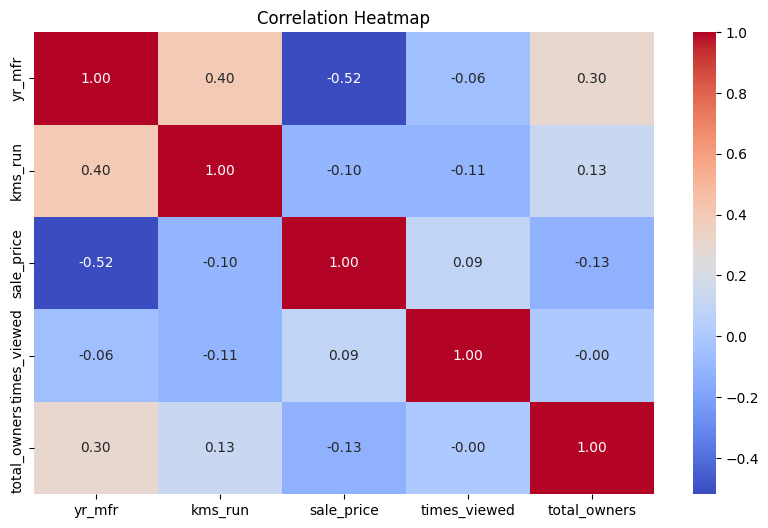

In [32]:
plt.figure(figsize=(10,6))
numeric_cols = df.select_dtypes(include=['int64','float64']).corr()
sns.heatmap(numeric_cols, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [33]:
df.columns

Index(['yr_mfr', 'fuel_type', 'kms_run', 'sale_price', 'city', 'times_viewed',
       'body_type', 'transmission', 'variant', 'registered_city', 'make',
       'model', 'total_owners', 'fitness_certificate', 'warranty_avail'],
      dtype='object')

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor